In [21]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
csv_file_path = r'C:\Users\shris\Childrens National Hospital\Vidva, Robinson - neuropath_visium\measurements.csv'
df = pd.read_csv(csv_file_path)

df.head()

,Image,Object ID,Object type,Name,Classification,Parent,ROI,Centroid X µm,Centroid Y µm,Area µm^2,Perimeter µm
0,1055A.tif - BF.ome.tif,3406140d-289a-4183-9c60-4b2bb3c46a4c,Annotation,4.0,WM,Root object (Image),Geometry,5575.6,5120.3,1009275.1,19417.1
1,1055A.tif - BF.ome.tif,7a6de77b-e1b3-49e9-aefd-00501e43ab69,Annotation,1.0,EGL,Root object (Image),Geometry,5002.9,5067.5,752911.5,63362.4
2,1055A.tif - BF.ome.tif,db96d5d0-a937-44fd-ad6c-12612a1cde6d,Annotation,3.0,ML,Root object (Image),Geometry,4726.3,4520.2,7956042.7,97074.1
3,1055A.tif - BF.ome.tif,ea3a6a5b-c59d-4b72-b6b8-4ac708b48167,Annotation,2.0,IGL,Root object (Image),Geometry,5044.4,4038.4,10152471.3,75625.2
4,1055A.tif - BF.ome.tif,d45c7934-8bf0-427a-b1b3-e5c21ba4b26f,Annotation,3.0,ML_IGL_150uM,Root object (Image),Geometry,5077.3,4261.5,4460116.7,62817.0


# Preprocess the Data

In [22]:
# Preprocess the image column
# Step 1: Keep only the part before the first period
# Example: '1055A.tif-BF.ome.tif' -> '1055A'
df['temp'] = df['Image'].str.split('.', n=1).str[0]

# Step 2: Split into numeric (ID) and letter (Image) parts
# Example: '1055A' -> ID='1055', Image='A'
# Using regex to split numbers and letters
df['ID'] = df['temp'].str.extract('(\d+)', expand=False)  # Extract numbers
df['Image'] = df['temp'].str.extract('([A-Za-z]+)', expand=False)  # Extract letters

# Drop the temporary column
df = df.drop('temp', axis=1)

# Show the results
print("Sample of processed ID and Image columns:")
df[['ID', 'Image']].head()

Sample of processed ID and Image columns:


<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
C:\Users\shris\AppData\Local\Temp\ipykernel_38552\2205500910.py:9: SyntaxWarning: invalid escape sequence '\d'
  df['ID'] = df['temp'].str.extract('(\d+)', expand=False)  # Extract numbers


,ID,Image
0,1055,A
1,1055,A
2,1055,A
3,1055,A
4,1055,A


In [23]:
df['Classification'].unique()

array(['WM', 'EGL', 'ML', 'IGL', 'ML_IGL_150uM'], dtype=object)

In [24]:
# Drop rows where Classification is ML_IGL_150_uM
print(f"Number of rows before dropping ML_IGL_150_uM: {len(df)}")
df = df[df['Classification'] != 'ML_IGL_150uM']
print(f"Number of rows after dropping ML_IGL_150_uM: {len(df)}")

# Display sample of remaining classifications
print("\nUnique classifications in the dataset:")
print(df['Classification'].unique())

Number of rows before dropping ML_IGL_150_uM: 75
Number of rows after dropping ML_IGL_150_uM: 60

Unique classifications in the dataset:
['WM' 'EGL' 'ML' 'IGL']


In [25]:
# Create GA_weeks column based on ID mapping
ga_mapping = {
    '1055': 38,
    '1061': 40,
    '1210': 39,
    '4276': 26,
    '4389': 34,
    '4544': 30,
    '934': 27
}

# Drop rows with ID 1208
print(f"Number of rows before dropping ID 1208: {len(df)}")
df = df[df['ID'] != '1208']
print(f"Number of rows after dropping ID 1208: {len(df)}")

# Create GA_weeks column using the mapping
df['GA_weeks'] = df['ID'].map(ga_mapping)

# Verify the mapping
print("\nSample of data with GA_weeks:")
print(df[['ID', 'GA_weeks']].drop_duplicates().sort_values('ID'))

# Check if any IDs are missing GA values
missing_ga = df[df['GA_weeks'].isnull()]['ID'].unique()
if len(missing_ga) > 0:
    print(f"\nWarning: The following IDs have no GA mapping: {missing_ga}")


Number of rows before dropping ID 1208: 60
Number of rows after dropping ID 1208: 52

Sample of data with GA_weeks:
      ID  GA_weeks
0   1055        38
10  1061        40
25  1210        39
35  4276        26
45  4389        34
55  4544        30
65   934        27


In [26]:
df.head()

,Image,Object ID,Object type,Name,Classification,Parent,ROI,Centroid X µm,Centroid Y µm,Area µm^2,Perimeter µm,ID,GA_weeks
0,A,3406140d-289a-4183-9c60-4b2bb3c46a4c,Annotation,4.0,WM,Root object (Image),Geometry,5575.6,5120.3,1009275.1,19417.1,1055,38
1,A,7a6de77b-e1b3-49e9-aefd-00501e43ab69,Annotation,1.0,EGL,Root object (Image),Geometry,5002.9,5067.5,752911.5,63362.4,1055,38
2,A,db96d5d0-a937-44fd-ad6c-12612a1cde6d,Annotation,3.0,ML,Root object (Image),Geometry,4726.3,4520.2,7956042.7,97074.1,1055,38
3,A,ea3a6a5b-c59d-4b72-b6b8-4ac708b48167,Annotation,2.0,IGL,Root object (Image),Geometry,5044.4,4038.4,10152471.3,75625.2,1055,38
5,B,266cd2c0-0d20-421e-87a5-be918c600a99,Annotation,4.0,WM,Root object (Image),Geometry,6390.3,4316.3,728372.1,16033.5,1055,38


In [27]:
# Remove units from column headers
df = df.rename(columns={
    'Area µm^2': 'Area',
    'Perimeter µm': 'Perimeter',
    'Centroid X µm': 'Centroid_X',
    'Centroid Y µm': 'Centroid_Y'
})

# Display the updated column names
print("Updated column names:")
print(df.columns.tolist())

# Show sample of the data with new column names
df.head()

Updated column names:
['Image', 'Object ID', 'Object type', 'Name', 'Classification', 'Parent', 'ROI', 'Centroid_X', 'Centroid_Y', 'Area', 'Perimeter', 'ID', 'GA_weeks']


,Image,Object ID,Object type,Name,Classification,Parent,ROI,Centroid_X,Centroid_Y,Area,Perimeter,ID,GA_weeks
0,A,3406140d-289a-4183-9c60-4b2bb3c46a4c,Annotation,4.0,WM,Root object (Image),Geometry,5575.6,5120.3,1009275.1,19417.1,1055,38
1,A,7a6de77b-e1b3-49e9-aefd-00501e43ab69,Annotation,1.0,EGL,Root object (Image),Geometry,5002.9,5067.5,752911.5,63362.4,1055,38
2,A,db96d5d0-a937-44fd-ad6c-12612a1cde6d,Annotation,3.0,ML,Root object (Image),Geometry,4726.3,4520.2,7956042.7,97074.1,1055,38
3,A,ea3a6a5b-c59d-4b72-b6b8-4ac708b48167,Annotation,2.0,IGL,Root object (Image),Geometry,5044.4,4038.4,10152471.3,75625.2,1055,38
5,B,266cd2c0-0d20-421e-87a5-be918c600a99,Annotation,4.0,WM,Root object (Image),Geometry,6390.3,4316.3,728372.1,16033.5,1055,38


In [28]:
# Create Normalized_Area as Area/Perimeter
# This creates a separate list without modifying the dataframe
Normalized_Area = df['Area'] / df['Perimeter']

# Display first few values to verify
print("First few values of Normalized_Area:")
print(Normalized_Area.head())

# Display basic statistics of the normalized values
print("\nBasic statistics of Normalized_Area:")
print(Normalized_Area.describe())


First few values of Normalized_Area:
0     51.978673
1     11.882623
2     81.958449
3    134.247199
5     45.428141
dtype: float64

Basic statistics of Normalized_Area:
count     52.000000
mean      50.250544
std       37.794546
min        5.658119
25%       19.996078
50%       43.052926
75%       68.989495
max      183.641603
dtype: float64


In [29]:
# Merge ID and Image columns into Sample column
df['Sample'] = df['ID'] + df['Image']

# Show the first few rows to verify
print("Sample of data with new Sample column:")
print(df[['ID', 'Image', 'Sample']].head())


Sample of data with new Sample column:
     ID Image Sample
0  1055     A  1055A
1  1055     A  1055A
2  1055     A  1055A
3  1055     A  1055A
5  1055     B  1055B


# Visualize the Data

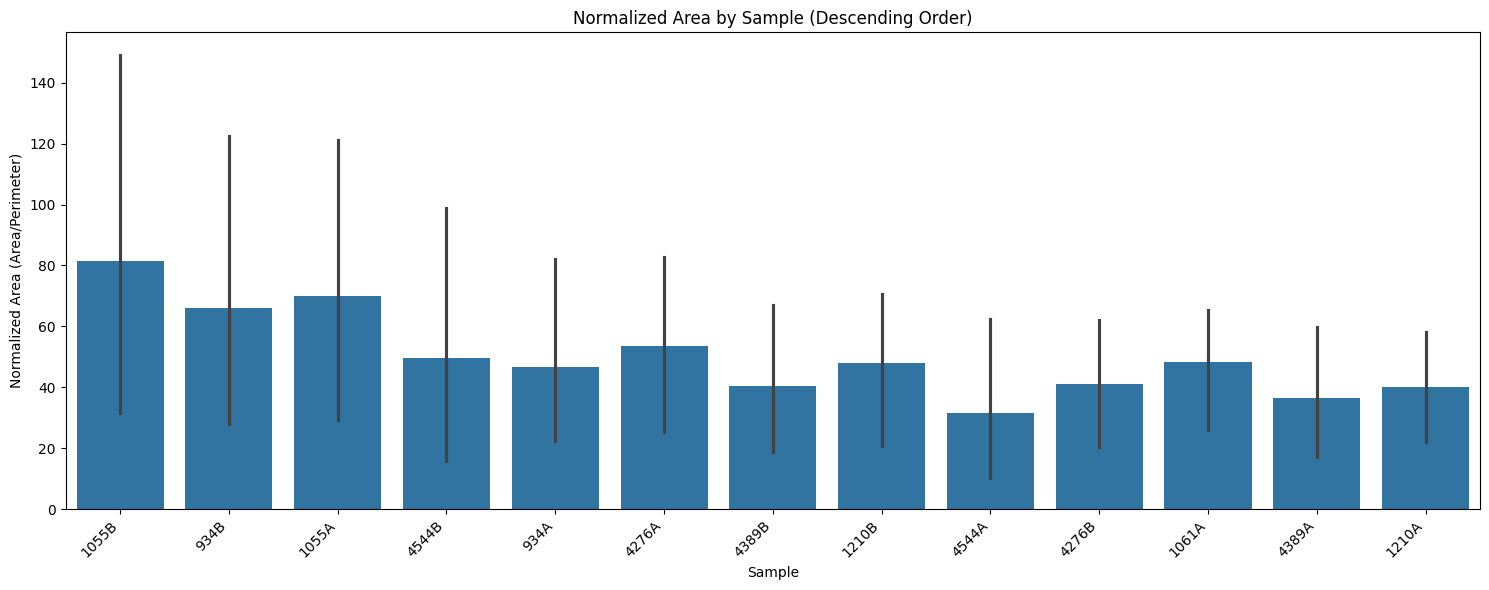

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure with larger size for better readability
plt.figure(figsize=(15, 6))

# Sort the data by Normalized_Area in descending order
# We need to create a temporary dataframe with the Normalized_Area for sorting
temp_df = df.copy()
temp_df['Normalized_Area'] = Normalized_Area
temp_df = temp_df.sort_values('Normalized_Area', ascending=False)

# Create bar plot with sorted data and specify error bars
sns.barplot(x='Sample', y='Normalized_Area', data=temp_df, 
            ci='se',  # Show standard error instead of 95% confidence interval
            capsize=0.1)  # Add caps to error bars

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Sample')
plt.ylabel('Normalized Area (Area/Perimeter)')
plt.title('Normalized Area by Sample (Descending Order)\nError bars show standard error')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Print some statistics about the variation
print("\nSummary statistics for each Sample:")
print(temp_df.groupby('Sample')['Normalized_Area'].agg(['mean', 'std', 'sem']).round(3))

In [ ]:
print()